In [1]:
import pandas as pd
import numpy as np
import os
from importlib import reload

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

from sklearn.model_selection import train_test_split
import skimage
from skimage import io
from skimage.transform import resize

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import time
import os
import copy

# local imports
import model as _model
import utils as _tools

In [2]:
"""
control the generation of trainning and dev datasets
"""

train, dev, _ = _tools.make_trainning_data(sample=10000, 
                                           return_frames=True, 
                                           state=None)

print()
print("Trainning label distribution")
print(train['Cardiomegaly'].value_counts(normalize=True, dropna=False))

print()
print("Development label distribution")
print(dev['Cardiomegaly'].value_counts(normalize=True, dropna=False))

sampling 10000 records
train.shape: (7500, 19)
dev.shape: (2500, 19)
valid.shape: (234, 19)
saved: ./train.csv
saved: ./dev.csv
saved: ./valid.csv

Trainning label distribution
 NaN    0.792400
 1.0    0.125333
 0.0    0.048533
-1.0    0.033733
Name: Cardiomegaly, dtype: float64

Development label distribution
 NaN    0.7980
 1.0    0.1140
 0.0    0.0512
-1.0    0.0368
Name: Cardiomegaly, dtype: float64


In [3]:
"""
build and train the model
"""

reload(_model)

# build the models
resnet = _model.TransferModel()

# train the model
resnet.train()


-------------------------------
Cardiomegaly Model epoch 1/10
Trainning loss: 0.6432 accuracy: 79.64 %
Validation loss: 0.5847 accuracy: 83.72 %

-------------------------------
Cardiomegaly Model epoch 2/10


/sw/arcts/centos7/python3.8-anaconda/2020.07/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Trainning loss: 0.5607 accuracy: 82.39 %
Validation loss: 0.5702 accuracy: 87.04 %

-------------------------------
Cardiomegaly Model epoch 3/10
Trainning loss: 0.4970 accuracy: 83.81 %
Validation loss: 0.5552 accuracy: 79.28 %

-------------------------------
Cardiomegaly Model epoch 4/10
Trainning loss: 0.4264 accuracy: 86.59 %
Validation loss: 0.5845 accuracy: 71.76 %

-------------------------------
Cardiomegaly Model epoch 5/10
Trainning loss: 0.3626 accuracy: 88.93 %
Validation loss: 0.6132 accuracy: 85.20 %

-------------------------------
Cardiomegaly Model epoch 6/10
Trainning loss: 0.2841 accuracy: 92.35 %
Validation loss: 0.5857 accuracy: 79.56 %

-------------------------------
Cardiomegaly Model epoch 7/10
Trainning loss: 0.2133 accuracy: 94.85 %
Validation loss: 0.6302 accuracy: 81.72 %

-------------------------------
Cardiomegaly Model epoch 8/10
Trainning loss: 0.1526 accuracy: 96.61 %
Validation loss: 0.7557 accuracy: 86.48 %

-------------------------------
Cardiome

In [4]:
# get results on dev set
results = resnet.evaluate_model(resnet.best_model, 
                                resnet.dataloader_dev, 
                                resnet.dev_map)
print(results.shape)

# get distributions of true labels
print()
print(results['y_true'].value_counts(normalize=True))

# get distributions of pred labels
print()
print(results['y_pred'].value_counts(normalize=True))

/home/cstansbu/.local/lib/python3.8/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


(2500, 3)

0.0    0.886
1.0    0.114
Name: y_true, dtype: float64

0    0.9388
1    0.0612
Name: y_pred, dtype: float64


In [5]:
results.head()

,y_prob,y_pred,y_true
0,0.193452,0,0.0
1,0.271800,0,0.0
2,0.446090,0,0.0
3,0.302258,0,0.0
4,0.143096,0,0.0


Text(0.5, 1.0, 'Distribution of Propensities')

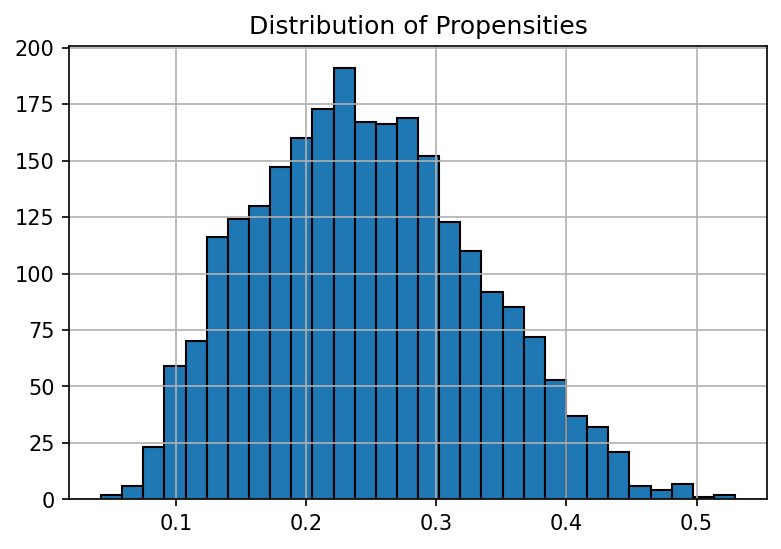

In [6]:
matplotlib.rcParams['figure.dpi'] = 150
results['y_prob'].hist(edgecolor='black', bins=30)
plt.title('Distribution of Propensities')

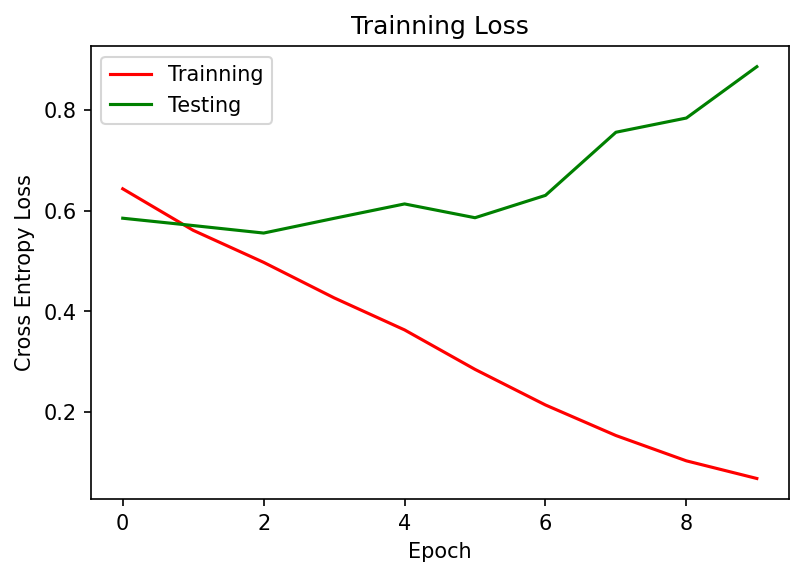

In [7]:
_time = list(range(len(resnet.train_loss_history)))

matplotlib.rcParams['figure.dpi'] = 150
plt.plot(_time, resnet.train_loss_history, c='red', label="Trainning")
plt.plot(_time, resnet.dev_loss_history, c='green', label="Testing")
plt.title("Trainning Loss")
plt.xlabel("Epoch")
plt.ylabel("Cross Entropy Loss")
plt.legend()

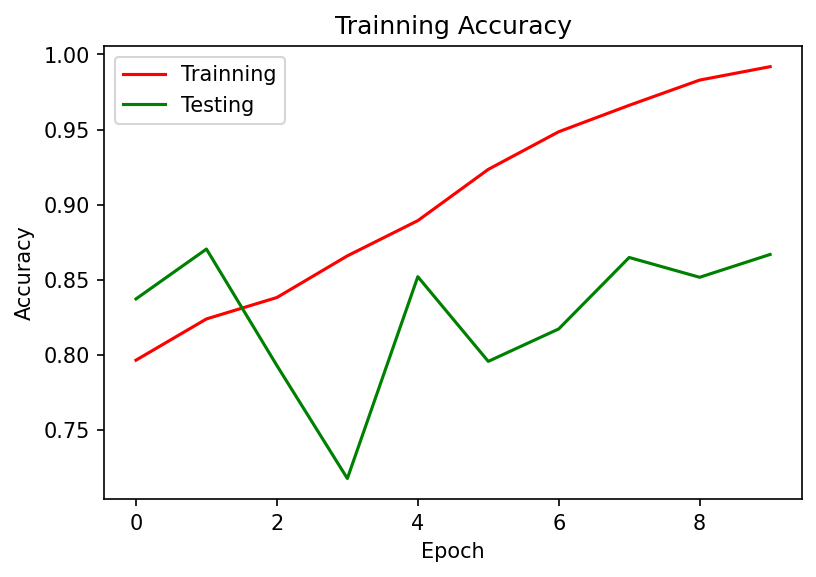

In [8]:
_time = list(range(len(resnet.train_acc_history)))

matplotlib.rcParams['figure.dpi'] = 150
plt.plot(_time, resnet.train_acc_history, c='red', label="Trainning")
plt.plot(_time, resnet.dev_acc_history, c='green', label="Testing")
plt.title("Trainning Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

In [9]:
reload(_tools)

res = _tools.get_classification_metrics(results)
res

,0
optimal_threshold,0.259067
true negatives,1331.000000
true positives,192.000000
false positives,884.000000
false negatives,93.000000
sensitivity,0.673684
specificity,0.600903
F1-score,0.282145
precision,0.178439
recall,0.673684


In [10]:
"""
save the model
"""

outpath = "models/resnet18.pth"
torch.save(resnet.model.state_dict(), outpath)
print(f"saved: {outpath}")

saved: models/resnet18.pth


In [12]:
# get results on valid set
results = resnet.evaluate_model(resnet.best_model, 
                                resnet.dataloader_valid, 
                                resnet.valid_map)
print(results.shape)

# get distributions of true labels
print()
print(results['y_true'].value_counts(normalize=True))

# get distributions of pred labels
print()
print(results['y_pred'].value_counts(normalize=True))

print()
res = _tools.get_classification_metrics(results)
res

/home/cstansbu/.local/lib/python3.8/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


(234, 3)

0.0    0.709402
1.0    0.290598
Name: y_true, dtype: float64

0    0.974359
1    0.025641
Name: y_pred, dtype: float64



,0
optimal_threshold,0.217745
true negatives,97.000000
true positives,55.000000
false positives,69.000000
false negatives,13.000000
sensitivity,0.808824
specificity,0.584337
F1-score,0.572917
precision,0.443548
recall,0.808824
